In [83]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib

In [84]:
symbol = 'BTC-USD'
df = yf.download(
  [symbol],
  start = "2016-01-31",
  end = "2020-01-31",
  interval="1d"
)

df['9-day MA'] = df['Close'].rolling(9).mean().shift(1)
df['21-day MA'] = df['Close'].rolling(21).mean().shift(1)

df['signal'] = np.where(df['9-day MA'] > df['21-day MA'], 1, 0)                     # signal de long si 9j MA > 21j MA
df['signal'] = np.where(df['9-day MA'] < df['21-day MA'], -1, df['signal'])          # signal de short si 9j MA < 21j MA
                                                                                    # on enleve les 21 jours inutilisables

df['return'] = np.log(df['Close']).diff()                                             #calcule revenues~~ via formule de differences des log
df['system_return'] = df['signal'] * df['return']                                   #calcule revenues si short ou long

df.dropna(inplace=True)

df['entry'] = df.signal.diff()                                                          #si on a un changement de long a short 

df.head()
##df_BTC.to_csv("BTC_1d_2016-2020_testMAstrat.csv")
##print(f"Got {len(df_BTC)} rows at 1day intervals")

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,9-day MA,21-day MA,signal,return,system_return,entry
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,
Date,,,,,,,,,,,
2016-02-21,438.798004,448.045990,429.076996,437.773010,89820704,409.741109,391.140664,1,0.003731,0.003731,NaN
2016-02-22,437.747986,439.045013,432.916992,438.989014,85385200,415.800554,394.475474,1,-0.002396,-0.002396,0.0
2016-02-23,420.735992,439.858002,417.821014,438.255005,85244896,420.899221,397.556045,1,-0.039638,-0.039638,0.0
2016-02-24,424.954987,425.549988,413.907013,420.955994,67743696,422.399885,399.760235,1,0.009978,0.009978,0.0
2016-02-25,424.544006,427.718994,420.415009,425.036987,70798000,425.152106,402.379567,1,-0.000968,-0.000968,0.0


In [85]:
matplotlib.rcParams['figure.figsize'] = 15, 15

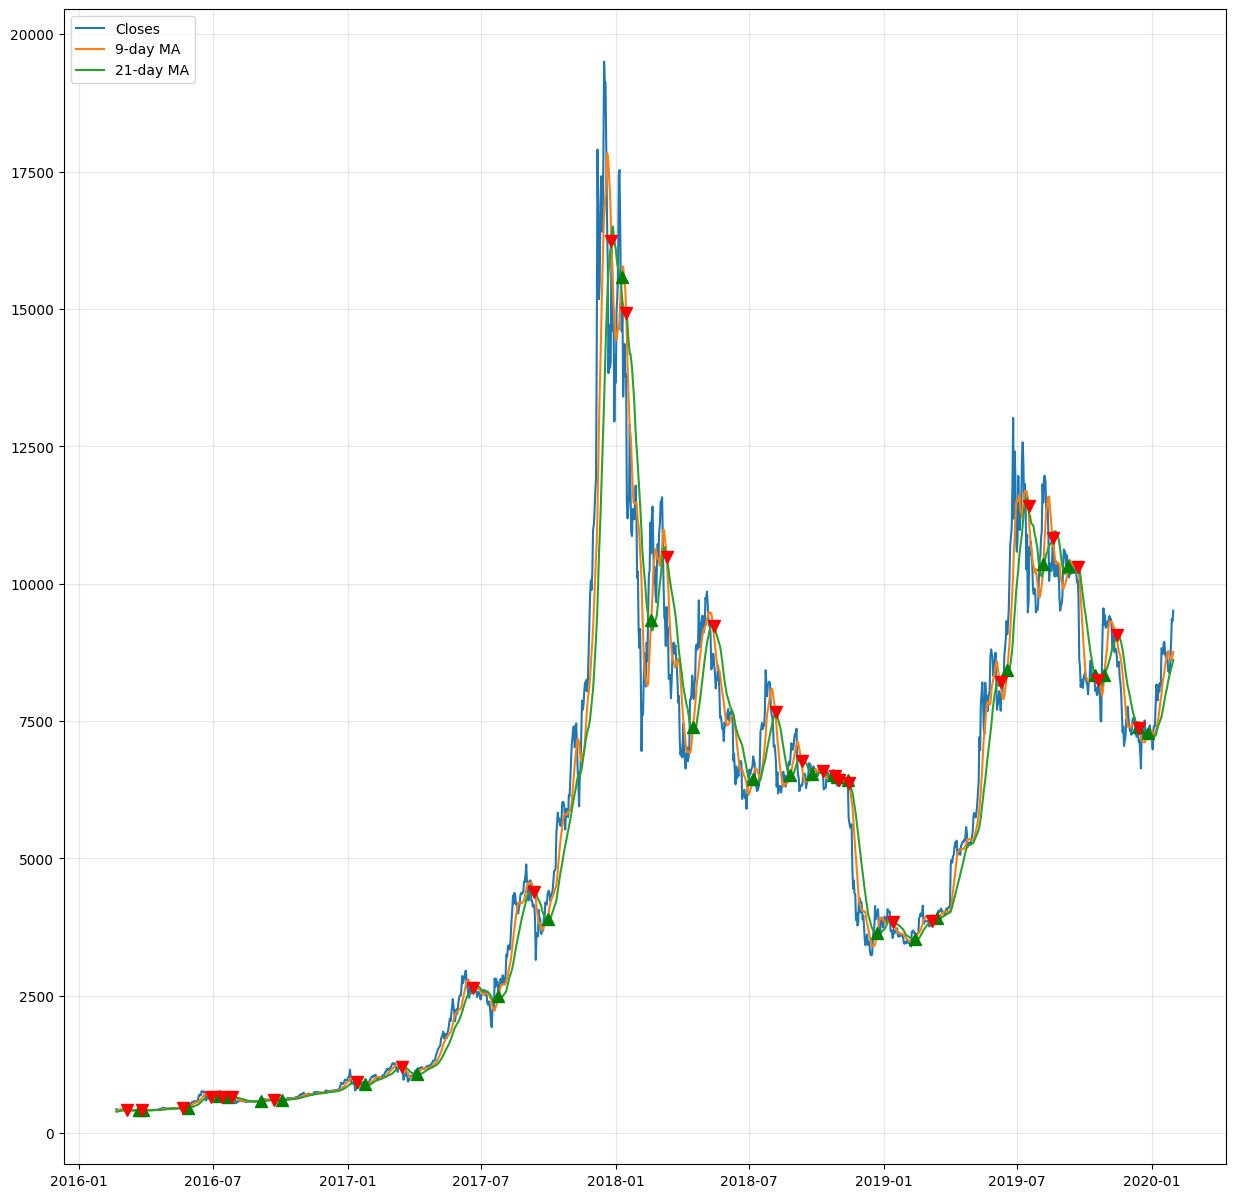

In [86]:

plt.grid(True, alpha = .3)

plt.plot(df['Close'],label = 'Closes')
plt.plot(df['9-day MA'], label = '9-day MA')
plt.plot(df['21-day MA'], label = '21-day MA')

plt.plot(df.loc[df.entry == 2].index, df['9-day MA'][df.entry == (2)], '^', color = 'g', markersize = 9)
plt.plot(df.loc[df.entry == -2].index, df['21-day MA'][df.entry == -2], 'v', color = 'r', markersize = 9)

plt.legend(loc=2)

/Users/matteogiori/TRADING BOT/TradingBot/venv_bot/lib/python3.9/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/matteogiori/TRADING BOT/TradingBot/venv_bot/lib/python3.9/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


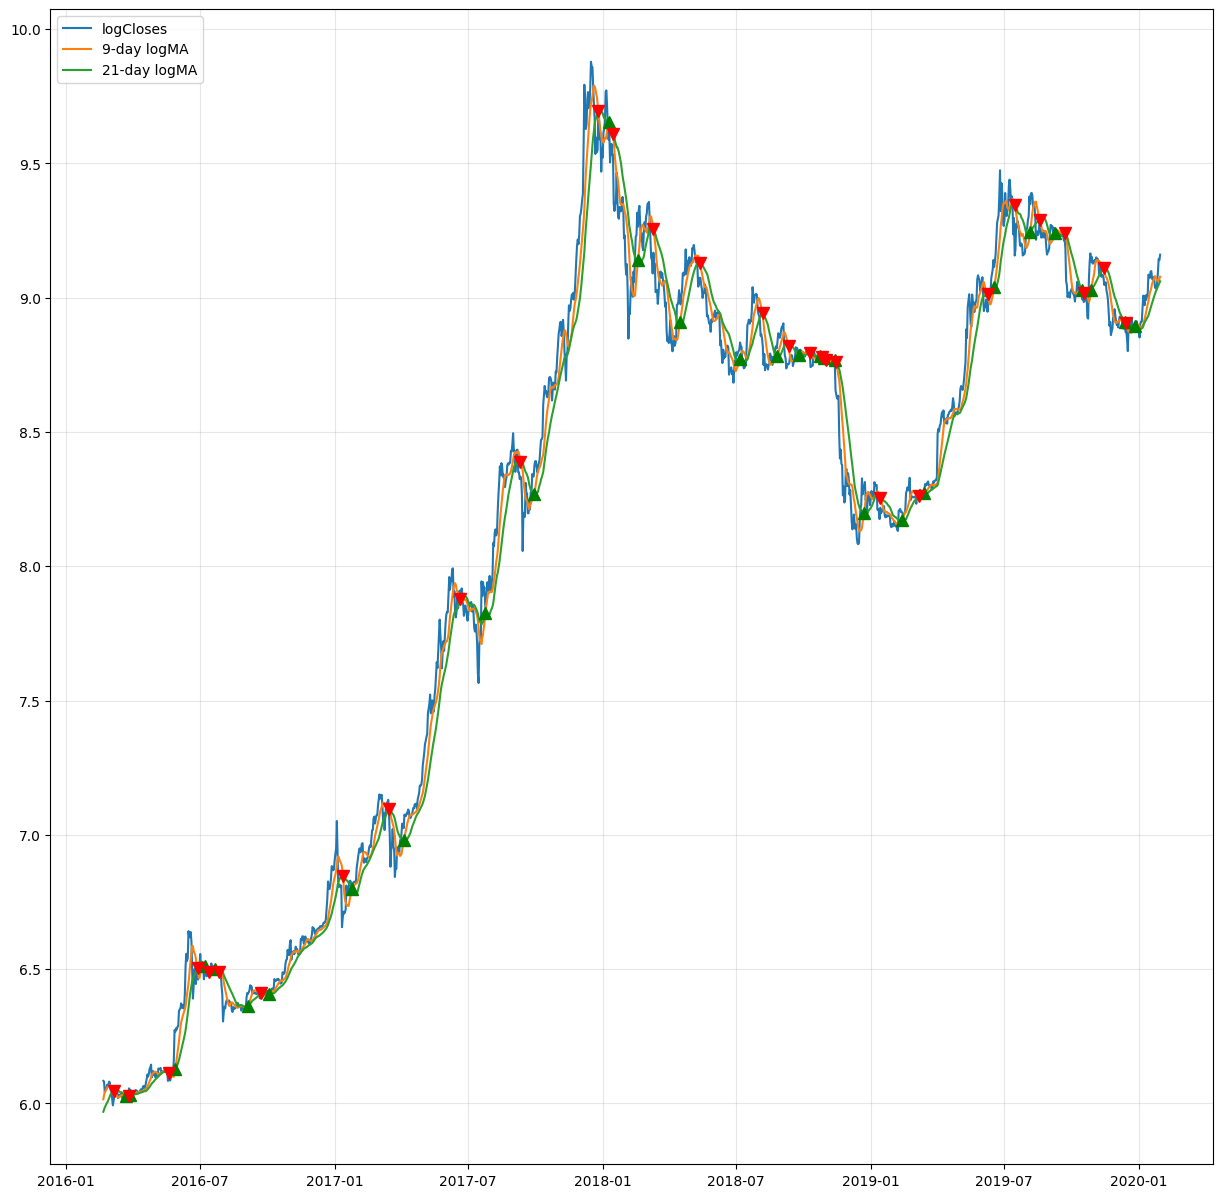

In [87]:
logBTC = np.log(df)

plt.grid(True, alpha = .3)
plt.plot(logBTC['Close'], label = 'logCloses')
plt.plot(logBTC['9-day MA'], label = '9-day logMA')
plt.plot(logBTC['21-day MA'], label = '21-day logMA')

plt.plot(logBTC.loc[df.entry == 2].index, logBTC['9-day MA'][df.entry == (2)], '^', color = 'g', markersize = 9)
plt.plot(logBTC.loc[df.entry == -2].index, logBTC['21-day MA'][df.entry == -2], 'v', color = 'r', markersize = 9)
plt.legend(loc=2)

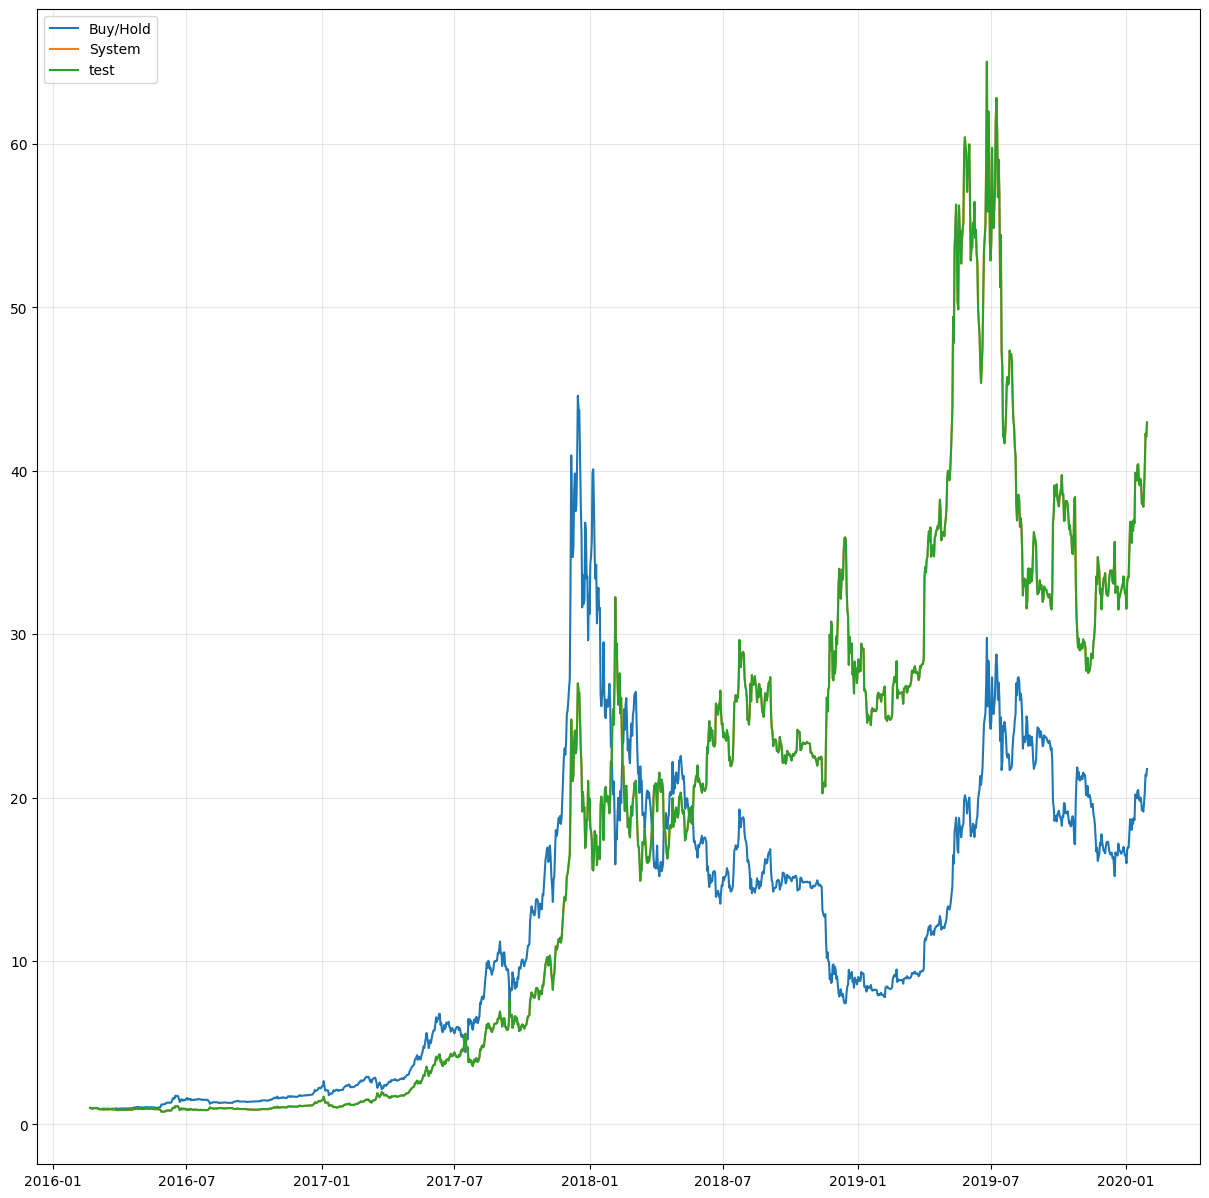

In [95]:
plt.plot(np.exp(df['return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(df['system_return']).cumprod(), label = 'System')
plt.plot(np.exp(df['system_return'].cumsum()), label='test')
plt.legend(loc=2)
plt.grid(True, alpha = .3)

In [89]:
print(np.exp(df['return']).cumprod()[-1]-1)

20.751546632842544


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_21968/578442778.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df['return']).cumprod()[-1]-1)


In [90]:
print(np.exp(df['system_return']).cumprod()[-1] - 1)

41.96000444600854


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_21968/2800198341.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df['system_return']).cumprod()[-1] - 1)


In [92]:
print(np.exp(df['system_return'].cumsum())[-1])

42.960004446008305


/var/folders/6x/40f088zn6lb1tw1zn99534440000gn/T/ipykernel_21968/2557051525.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df['system_return'].cumsum())[-1])
